<a href="https://colab.research.google.com/github/hxycorn/Stroke-Prediction/blob/main/Stroke_Prediction_with_EDA%2C_Feature_Engineering_and_Predictive_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>💟 **Stroke Prediction**</center>
<center><img src='Images/brain.jpg' width='50%'></center>





## About Dataset

*According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.*

**Attribute Information**

1) **id**: unique identifier

2) **gender**: "Male", "Female" or "Other"

3) **age**: age of the patient

4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) **ever_married**: "No" or "Yes"

7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) **Residence_type**: "Rural" or "Urban"

9) **avg_glucose_level**: average glucose level in blood

10) **bmi**: body mass index

11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) **stroke**: 1 if the patient had a stroke or 0 if not


**Data Source**: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


😎Now, let's get started!



## Exploratory Data Analysis (EDA)

### Import libraries and load data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
path = 'Data/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#statistics of numerical data
round(df.describe(),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [ ]:
# stats of categorical data
round(df.describe(exclude=['float64', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### <font color='green'>Initial insights about dataset </font>



*   201 data is missing from BMI features
*   Dataset contains both numerical and categorical features:

  * Continuous numerical: age, avg_glucose_level, bmi
  * Binary numerical: hypertension, heart_disease, stroke (could be converted into categorical data as well)
  * Categorical: gender, ever_married, work_type, Residence_type, smoking_status

* Feature extraction can be done by bining the continous numeric features, but let's keep them as it is for now. 
* Moste of the features are categorical, which need a special attention to visualization those



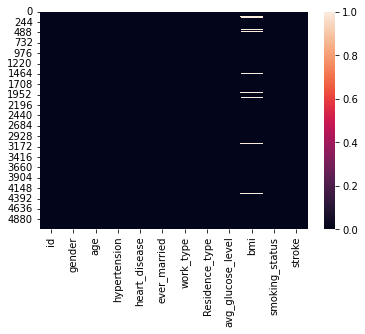

In [ ]:
# visualization of nullity of the dataset
sns.heatmap(df.isnull())

- From the descriptive statistics, we observed that the mean and median values of bmi are very close. Thus, we will fill the missing values with the median value.

In [ ]:
# Fill Missing Data
df_1 = df.copy()
df_1['bmi'] = df_1['bmi'].fillna(df_1['bmi'].median())
df_1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# as id number is just a unique identifier, we will drop it
df_1.drop('id', axis=1, inplace=True)

In [ ]:
df_1.columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [ ]:
# Transform the non-numerical labels in categorical features into numerical labels

text_cat_feature = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
le = LabelEncoder()
df_2 = df_1.copy()

text_label = []
num_label = []

for i, feature in enumerate(text_cat_feature):
  df_2[feature] = le.fit_transform(df_2[feature])
  num_label.append(list(df_2[feature].unique()))
  text_label.append(le.inverse_transform(df_2[feature].unique()))
  print(f'{feature}: {text_label[i]} = {num_label[i]} ')


gender: ['Male' 'Female' 'Other'] = [1, 0, 2] 
ever_married: ['Yes' 'No'] = [1, 0] 
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] = [2, 3, 0, 4, 1] 
residence_type: ['Urban' 'Rural'] = [1, 0] 
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] = [1, 2, 3, 0] 


In [ ]:
# Store all the encoded label's original and encoded value into a dictionary
label = {}
for i in range(len(text_cat_feature)):
  label[text_cat_feature[i]] = {}
  for text, value in zip(text_label[i], num_label[i]):
    label[text_cat_feature[i]][value] = text
# Add hypertension and heart disearse features into the dictionary

label['hypertension'] = {0: 'no hypertension', 1:'hypertension'}
label['heart_disease'] = {0:'no heart disease', 1:'heart disearse'}

label

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'no hypertension', 1: 'hypertension'},
 'heart_disease': {0: 'no heart disease', 1: 'heart disearse'}}

### <font color='green'>Taget variable (stroke) visualization






In [ ]:
sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [ ]:
colors = sns.set_palette('Pastel1')

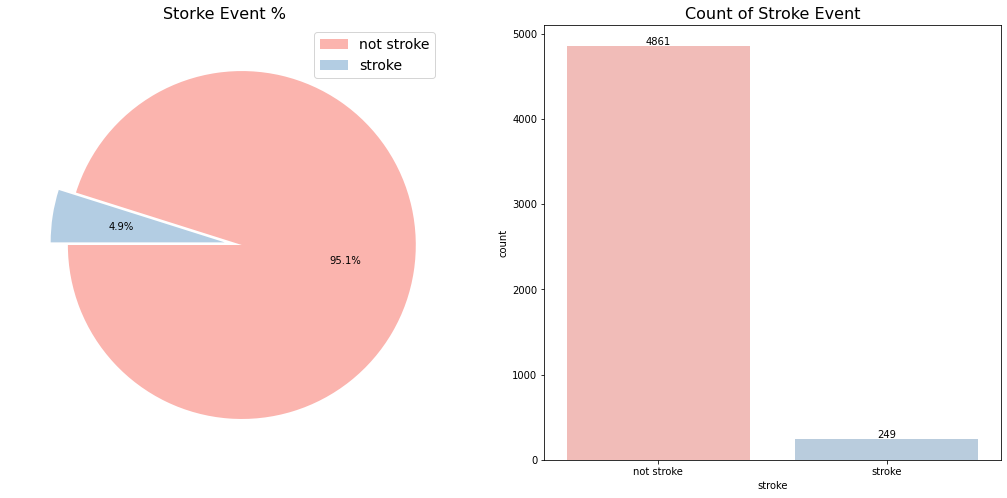

In [ ]:
plt.subplots(1,2, figsize=(18,8))
pie = df_2['stroke'].value_counts()
plt.subplot(1,2,1)
plt.pie(pie, colors=colors, autopct='%.1f%%', wedgeprops={'linewidth':3}, explode=[0.1,0],startangle=180)
plt.legend(['not stroke', 'stroke'], fontsize=14)
plt.title('Storke Event %', fontsize=16)
plt.subplot(1,2,2)
ax = sns.countplot(df_2['stroke'])
ax.set_xticklabels(['not stroke', 'stroke'])
for i in ax.patches:
  ax.text(i.get_width()/2+i.get_x(), i.get_height()+10, i.get_height(), horizontalalignment='center')        #the height of the rectangle is the value of the count
plt.title('Count of Stroke Event', fontsize=16)
plt.tight_layout
plt.show()

- The dataset is significant unbalanced, in the favor of "not stroke".
- The ratio of Stroke:Not Stroke is 19:1
- Thus, the baseline accuracy is 95.1%

### <font color='green'>Numerous Features Visualization

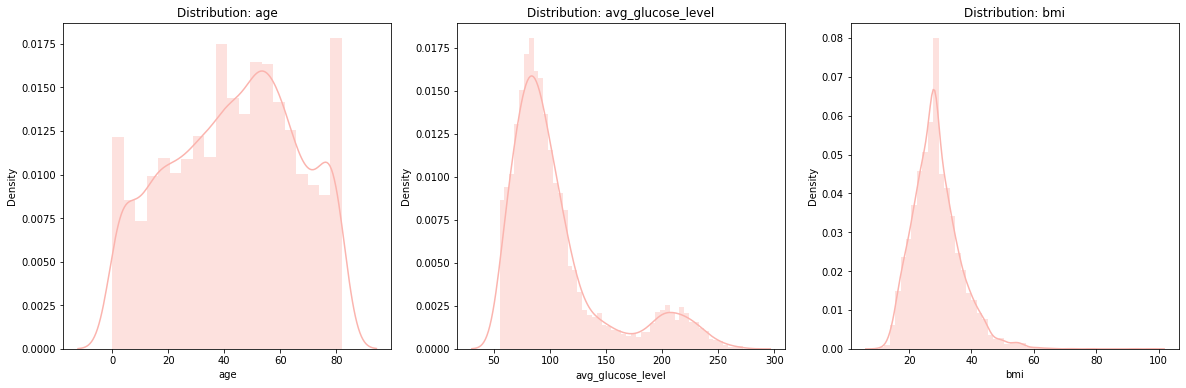

In [ ]:
num_features = ['age', 'avg_glucose_level', 'bmi']
plt.subplots(1,3, figsize=(20,6))
for i in range(3):
  plt.subplot(1,3, i+1)
  sns.distplot(df_2[num_features[i]])
  plt.title(f"Distribution: {num_features[i]}")
plt.tight_layout
plt.show()

* Based on age, we have data from people of a wide age range. It may be helpful to group them. 
* The glucose data shows most people have control of their glucose level (100), while there is a peak group at high glucos level (~200).
* BMI data is highly skewed right with an average around 30. 




For feature extraction, binning is applied for all three continuous numeric features if reference of following articles:

- [age](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)
- [glucose level](https://www.emedihealth.com/glands-hormones/diabetes/manage-diabetes#diabetes_and_rising_sugar_levels)
- [bmi](https://www.medicalnewstoday.com/articles/323446#body-mass-index-bmi)


In [ ]:
#binning of numerical variables
df_3 = df_2.copy()

df_3['age_cat'] = pd.cut(df_3['age'], bins = [0,13,18,41, 61,100], labels = ['children', 'teenager', 'adult', 'middle-aged', 'elderly'])
df_3['glucose_cat'] = pd.cut(df_3['avg_glucose_level'], bins = [50,70,125,200,280], labels = ['low', 'normal', 'high', 'extreme_high'])
df_3['bmi_cat'] = pd.cut(df_3['bmi'], bins = [0,18.5,25,30,100], labels=['underweight', 'normal', 'overweight', 'obesity'])

In [ ]:
from matplotlib.gridspec import GridSpec

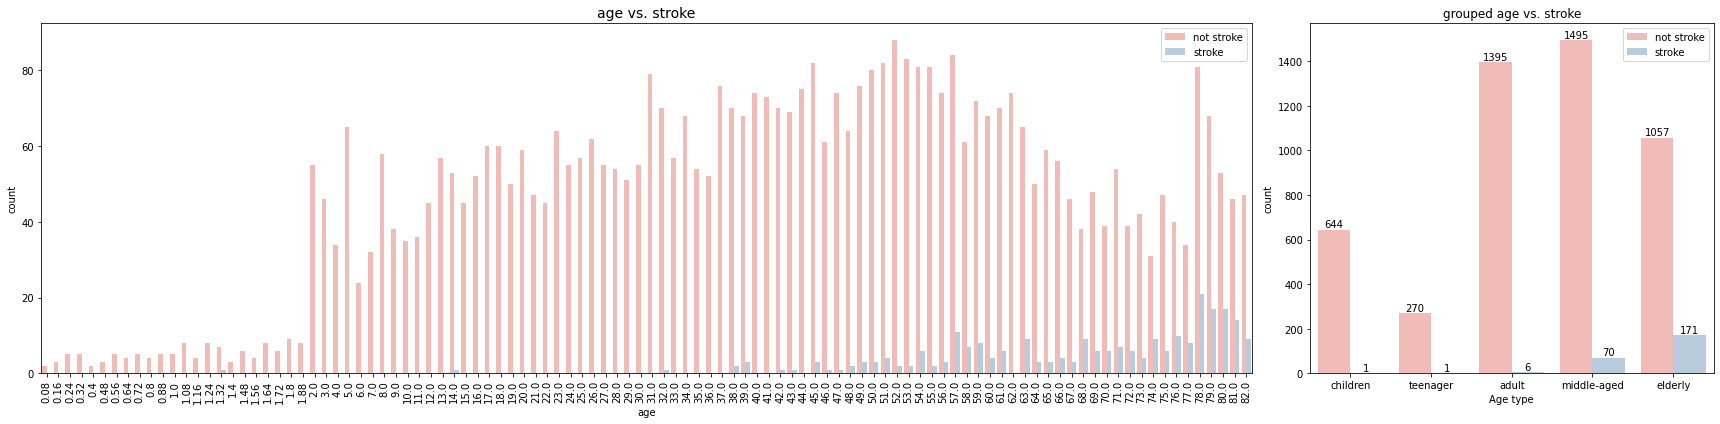

In [ ]:
#age visualization
fig = plt.figure(figsize=(24,6))
gs = GridSpec(1,2, width_ratios = [3,1])   #control of the relative sizes of subplots with width_ratios and height_ratios
ax1 = fig.add_subplot(gs[:,0])
sns.countplot(df_3['age'], hue=df_3['stroke'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('age vs. stroke', fontsize=14)
ax1.legend(['not stroke', 'stroke'])
ax2 = fig.add_subplot(gs[:,1])
sns.countplot(df_3['age_cat'], hue=df_3['stroke'])
ax2.legend(['not stroke', 'stroke'])
ax2.set_xlabel('Age type')
for i in ax2.patches:
  ax2.text(i.get_x()+i.get_width()/2, i.get_height()+10, i.get_height(), horizontalalignment='center')
ax2.set_title('grouped age vs. stroke')
plt.tight_layout()
plt.show()

Age is an important feature. Age feature distribution is not a normal distriubtion, which needs to be tranformed later. From catergorical features it can be seen that old age people are mostly having strokes, compared to younger ones.

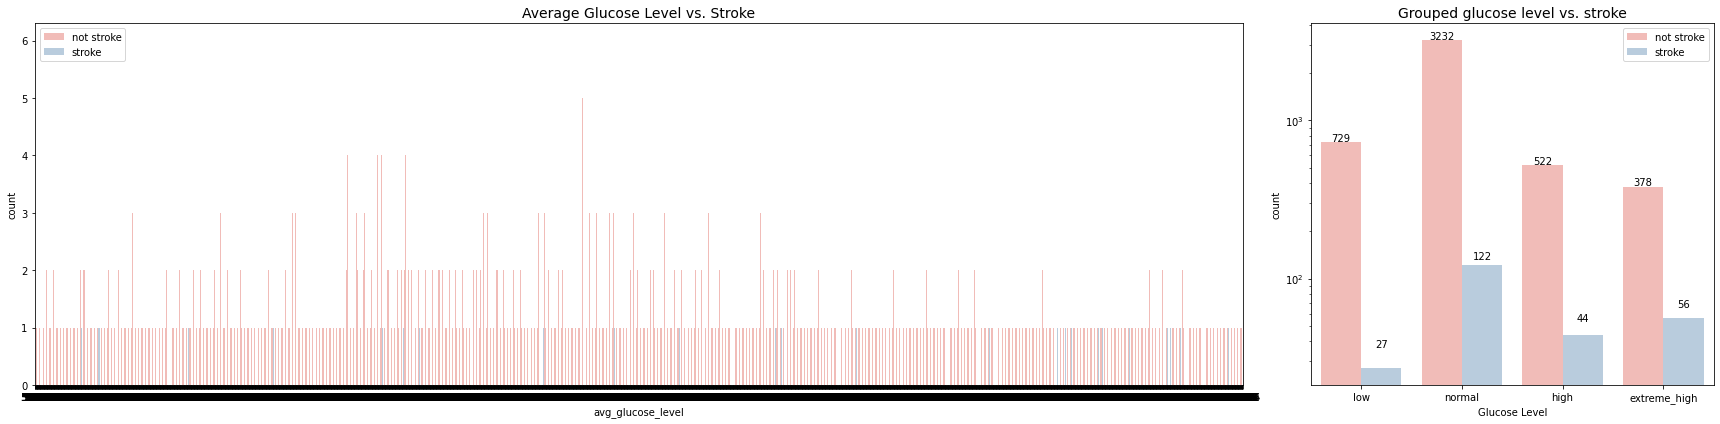

In [ ]:
# glucose_level visualization
fig = plt.figure(figsize=(24,6))
gs = GridSpec(1,2, width_ratios=[3,1], figure=fig)
ax1 = fig.add_subplot(gs[:,0])
ax1.set_title('Average Glucose Level vs. Stroke', fontsize = 14)
sns.countplot(df_3['avg_glucose_level'], hue=df_3['stroke'])
ax1.legend(['not stroke', 'stroke'])
ax2 = fig.add_subplot(gs [:,1])
sns.countplot(df_3['glucose_cat'], hue=df_3['stroke'])
ax2.set_title('Grouped glucose level vs. stroke', fontsize = 14)
ax2.set_xlabel('Glucose Level')
ax2.legend(['not stroke', 'stroke'])
ax2.set_yscale('log')
for i in ax2.patches:
  ax2.text(i.get_x()+i.get_width()/2, i.get_height()+10, i.get_height(), horizontalalignment='center')
plt.tight_layout()
plt.show()

People with low glucose level are less likely to have stroke. Interestingly, people with the normal level of glucose present the highest ratio of getting stroke. 

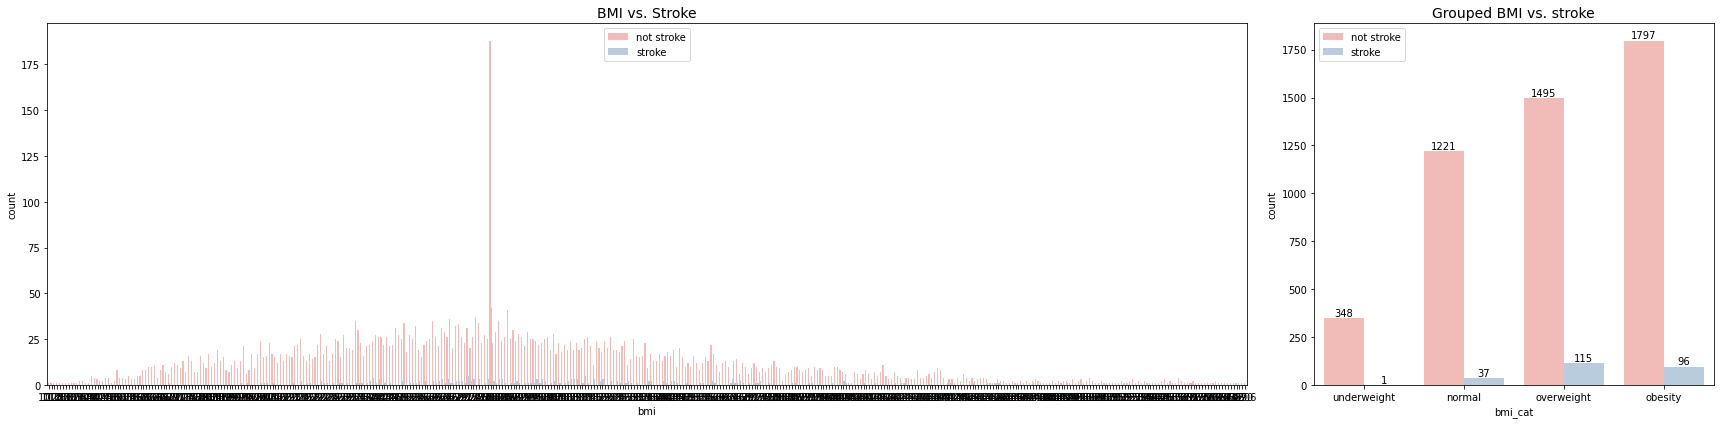

In [ ]:
# bim visualization
fig = plt.figure(figsize=(24,6))
gs = GridSpec(1,2, width_ratios=[3,1])
ax1 = fig.add_subplot(gs[:,0])
ax1.set_title('BMI vs. Stroke', fontsize = 14)
sns.countplot(df_3['bmi'], hue=df_3['stroke'])
ax1.legend(['not stroke', 'stroke'])
ax2 = fig.add_subplot(gs [:,1])
sns.countplot(df_3['bmi_cat'], hue=df_3['stroke'])
ax2.set_title('Grouped BMI vs. stroke', fontsize = 14)
ax2.legend(['not stroke', 'stroke'])
for i in ax2.patches:
  ax2.text(i.get_x()+i.get_width()/2, i.get_height()+10, i.get_height(), horizontalalignment='center')
plt.tight_layout()
plt.show()

High bmi represents higher possibility of getting stroke. 

### <font color='green'> Categorical Features Visualization

In [ ]:
df_3.head()
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

**Distribution of Categorical Features**

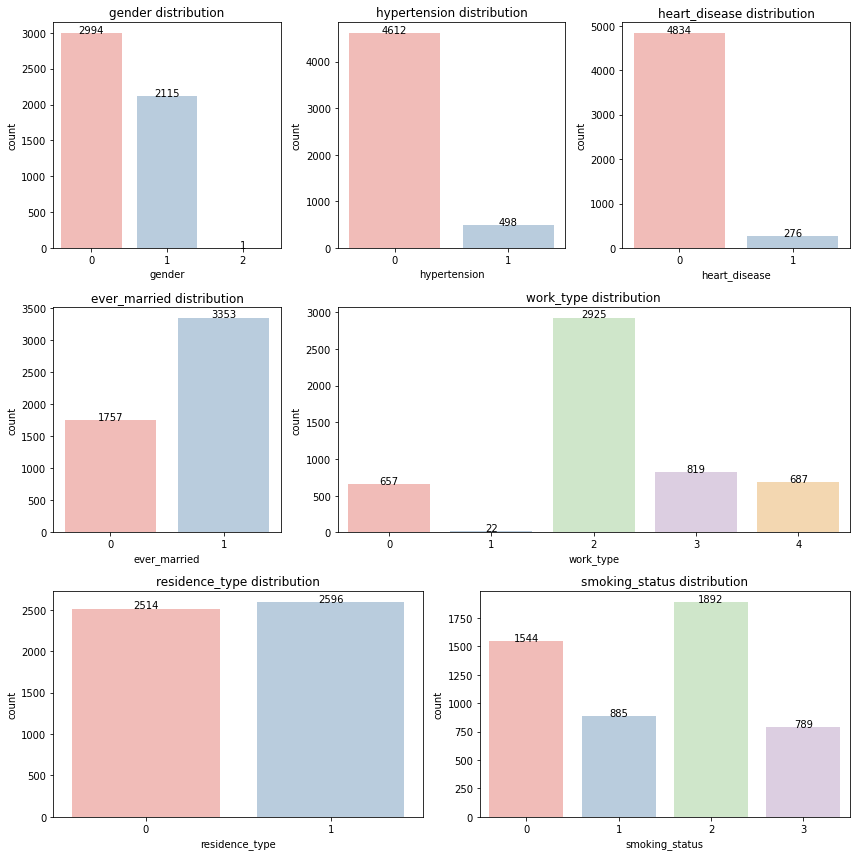

In [ ]:
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3,6)
ax1=fig.add_subplot(gs[0,0:2])
ax2=fig.add_subplot(gs[0,2:4])
ax3=fig.add_subplot(gs[0,4:])
ax4=fig.add_subplot(gs[1,0:2])
ax5=fig.add_subplot(gs[1,2:])
ax6=fig.add_subplot(gs[2,0:3])
ax7=fig.add_subplot(gs[2,3:6])
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
i = 0
for feature in cat_features:
  sns.countplot(df_3[feature],ax=axs[i])
  axs[i].set_title(f'{feature} distribution')
  for j in axs[i].patches:
    axs[i].text(j.get_x()+j.get_width()/2, j.get_height()+2, j.get_height(), horizontalalignment='center')
  i+=1


plt.tight_layout()
plt.show()

The overview of the categorical distribution shows that some features are not balanced. 

**Categorical Features vs. Stroke**

In [ ]:
label

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'no hypertension', 1: 'hypertension'},
 'heart_disease': {0: 'no heart disease', 1: 'heart disearse'}}

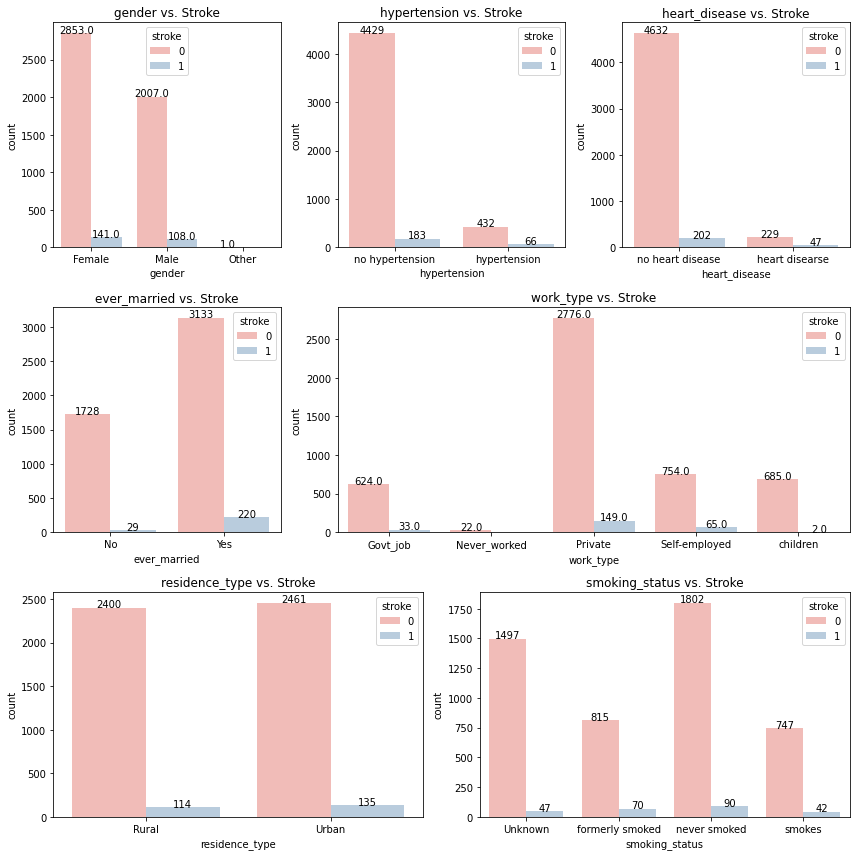

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(3, 6)
ax1=fig.add_subplot(gs[0,0:2])
ax2=fig.add_subplot(gs[0,2:4])
ax3=fig.add_subplot(gs[0,4:])
ax4=fig.add_subplot(gs[1,0:2])
ax5=fig.add_subplot(gs[1,2:])
ax6=fig.add_subplot(gs[2,0:3])
ax7=fig.add_subplot(gs[2,3:6])
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
i = 0
for feature in cat_features:
  sns.countplot(df_3[feature], hue=df_3['stroke'], ax=axs[i])
  axs[i].set_title(f'{feature} vs. Stroke')
  for j in axs[i].patches:
    axs[i].text(j.get_x()+j.get_width()/2, j.get_height()+2, j.get_height(), horizontalalignment='center')
  axs[i].set_xticklabels([label[feature][k] for k in sorted(df_3[feature].unique())])
  i+=1
plt.tight_layout()
plt.show()

Overview of the categorical features shows the value counts of the strokes and no strokes for each categorical feature. This overview could give some insight where strokes are high in number.
- Male has a slight higher chance of getting stroke than female. 
- Comparing with healthy people, people with hypertension and heart disease are more likely to get stroke than those not. 
- Married people have much higher chance of getting stroke. Maybe because the marriage rate for young people is lower. 
- The difference among work type, residence type, and smoking status are not obvious. 

**Gender vs. Stroke**

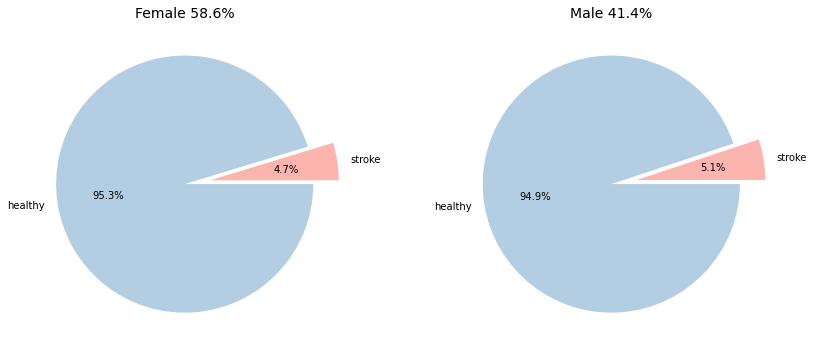

In [ ]:
gen_stroke = df_3.query('stroke==1')['gender'].value_counts()
gen_healthy = df_3.query('stroke==0')['gender'].value_counts()
gen = df_3['gender'].value_counts()
gen_code = sorted(df_3['gender'].unique())
plt.subplots(1,2,figsize=(12,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.pie([gen_stroke[i], gen_healthy[i]], explode=(0.2,0), autopct='%.1f%%', labels=['stroke', 'healthy'])
  plt.title(f"{label['gender'][gen_code[i]]} {round(gen[i]/(gen.sum())*100,1)}%", fontsize=14)
plt.tight_layout()
plt.show()

Risk of stroke in female and male are similar, with male risk slightly higher (0.4%).

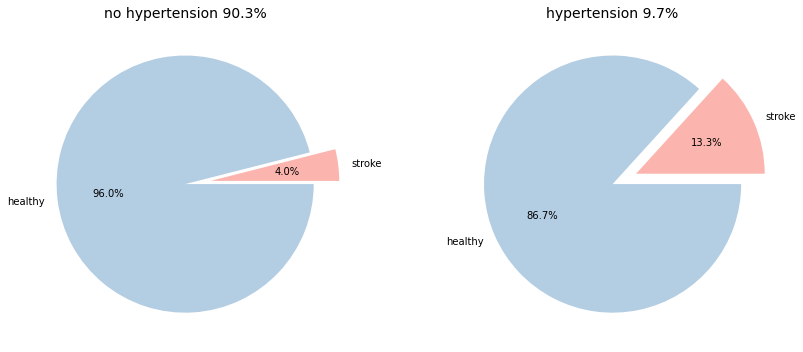

In [ ]:
# Hypertension
hypertension_stroke = df_3.query('stroke==1')['hypertension'].value_counts()
hypertension_healthy = df_3.query('stroke==0')['hypertension'].value_counts()
hypertension = df_3['hypertension'].value_counts()
hypertension_code = sorted(df_3['hypertension'].unique())
plt.subplots(1,2,figsize=(12,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.pie([hypertension_stroke[i], hypertension_healthy[i]], explode=(0.2,0), autopct='%.1f%%', labels=['stroke', 'healthy'])
  plt.title(f"{label['hypertension'][hypertension_code[i]]} {round(hypertension[i]/(hypertension.sum())*100,1)}%", fontsize=14)
plt.tight_layout()
plt.show()

Risk of stroke for people with hypertension is comparatively high, people with hypertension has 9% more chance to have stroke.

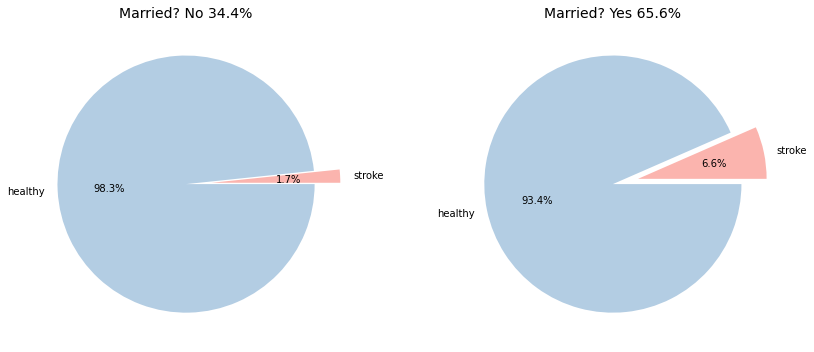

In [ ]:
# Marriage
ever_married_stroke = df_3.query('stroke==1')['ever_married'].value_counts()
ever_married_healthy = df_3.query('stroke==0')['ever_married'].value_counts()
ever_married = df_3['ever_married'].value_counts()
ever_married_code = sorted(df_3['ever_married'].unique())
plt.subplots(1,2,figsize=(12,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.pie([ever_married_stroke[i], ever_married_healthy[i]], explode=(0.2,0), autopct='%.1f%%', labels=['stroke', 'healthy'])
  plt.title(f"Married? {label['ever_married'][ever_married_code[i]]} {round(ever_married[i]/(ever_married.sum())*100,1)}%", fontsize=14)
plt.tight_layout()
plt.show()

Risk of stroke in married people is relatively higher than people not married with about 5%.


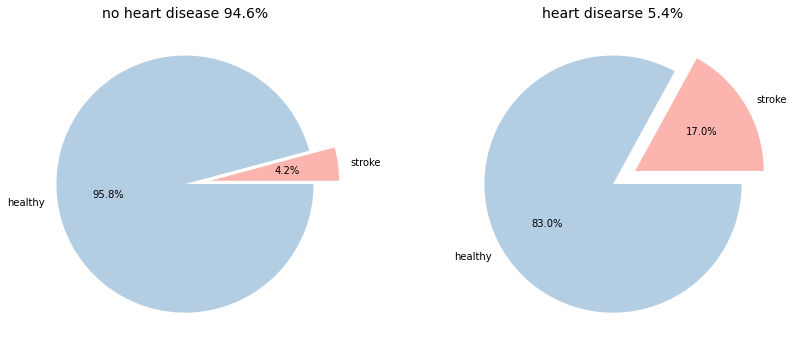

In [ ]:
# Heart disease
heart_disease_stroke = df_3.query('stroke==1')['heart_disease'].value_counts()
heart_disease_healthy = df_3.query('stroke==0')['heart_disease'].value_counts()
heart_disease = df_3['heart_disease'].value_counts()
heart_disease_code = sorted(df_3['heart_disease'].unique())
plt.subplots(1,2,figsize=(12,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.pie([heart_disease_stroke[i], heart_disease_healthy[i]], explode=(0.2,0), autopct='%.1f%%', labels=['stroke', 'healthy'])
  plt.title(f"{label['heart_disease'][heart_disease_code[i]]} {round(heart_disease[i]/(heart_disease.sum())*100,1)}%", fontsize=14)
plt.tight_layout()
plt.show()

Risk of stroke for people with heart disease is comparatively high, people with hypertension has nearly 13% more chance to have stroke.


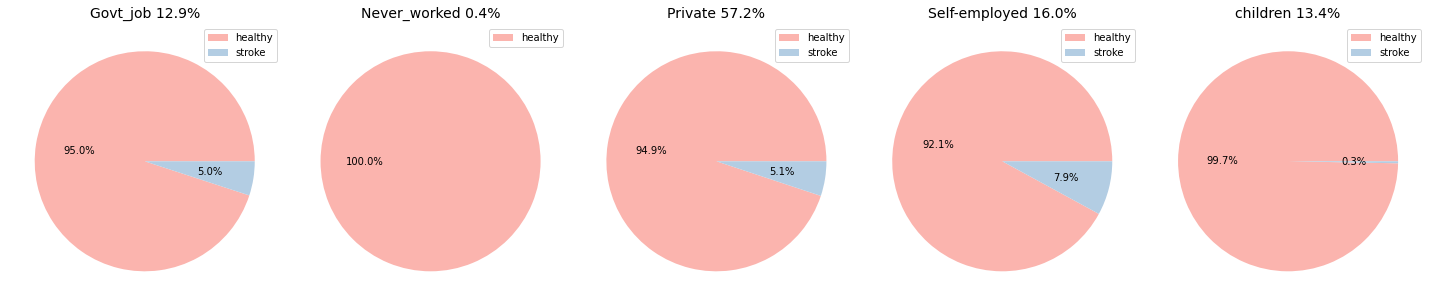

In [ ]:
# Work type
work_type_status = df_3.groupby(['work_type', 'stroke'])['work_type'].count()
work_type = df_3['work_type'].value_counts()
work_type_code = sorted(df_3['work_type'].unique())
plt.subplots(1,5,figsize=(20,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.pie(work_type_status[i], autopct='%.1f%%')
  plt.title(f"{label['work_type'][work_type_code[i]]} {round(work_type[i]/(work_type.sum())*100,1)}%", fontsize=14)
  plt.legend(['healthy', 'stroke'])
plt.tight_layout()
plt.show()

As per percentage, people who are self-employed are most likely to have stroke. While most of the strokes could be seen in privatly employed people.

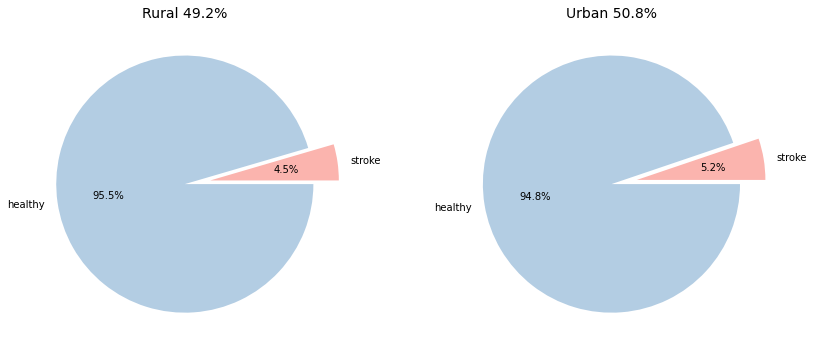

In [ ]:
# Residence type 
residence_type_stroke = df_3.query('stroke==1')['residence_type'].value_counts()
residence_type_healthy = df_3.query('stroke==0')['residence_type'].value_counts()
residence_type = df_3['residence_type'].value_counts()
residence_type_code = sorted(df_3['residence_type'].unique())
plt.subplots(1,2,figsize=(12,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.pie([residence_type_stroke[i], residence_type_healthy[i]], explode=(0.2,0), autopct='%.1f%%', labels=['stroke', 'healthy'])
  plt.title(f"{label['residence_type'][residence_type_code[i]]} {round(residence_type[i]/(residence_type.sum())*100,1)}%", fontsize=14)
plt.tight_layout()
plt.show()

Life style does not have much effect on the stroke rate. Both of them have similar stroke rate at about 5%. 

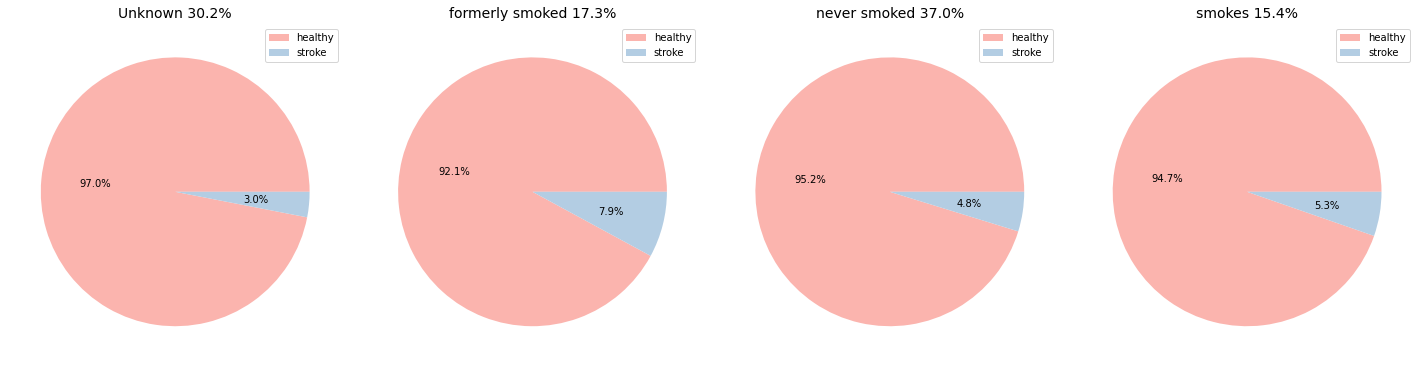

In [ ]:
# smoking
smoking_status_ = df_3.groupby(['smoking_status', 'stroke'])['smoking_status'].count()
smoking_status_type = df_3['smoking_status'].value_counts()
smoking_status_code = sorted(df_3['smoking_status'].unique())
plt.subplots(1,4,figsize=(20,5))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.pie(smoking_status_[i], autopct='%.1f%%')
  plt.title(f"{label['smoking_status'][smoking_status_code[i]]} {round(smoking_status_type[i]/(smoking_status_type.sum())*100,1)}%", fontsize=14)
  plt.legend(['healthy', 'stroke'])
plt.tight_layout()
plt.show()

Seems smoking does have an effect on strokes. Formerly smoked people are most likely to have stroke.  

### <font color='green'>Visualization of correlation between various features

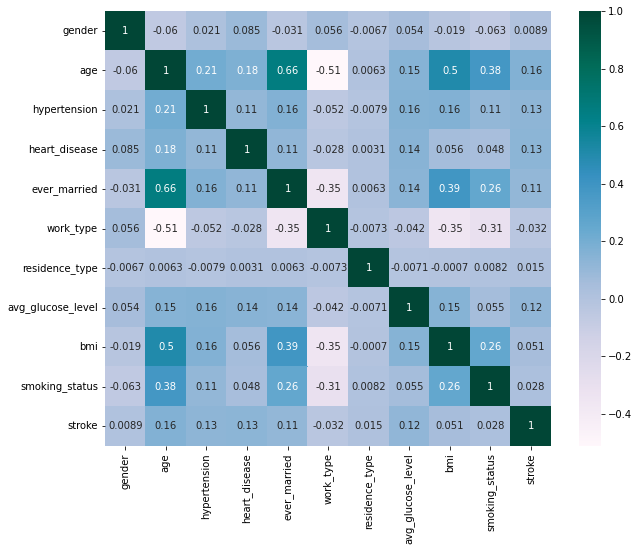

In [ ]:
df_4 = df_3.copy()
df_4 = df_4.drop(columns=['age_cat', 'glucose_cat', 'bmi_cat'])
#log transformation
for feature in ['age', 'avg_glucose_level', 'bmi']:
  df_4[feature] = np.log(df_4[feature])

# normalizing all number features with Standard Scaler
scaler = StandardScaler()
cols = df_4.columns
df_4[cols] = scaler.fit_transform(df_4[cols]) 


plt.figure(figsize=(10,8))
sns.heatmap(df_4.corr(), annot=True, cmap='PuBuGn')

- Higly positive correlation is existed between age and several features (i.e. ever_married, bmi, smoking_status,etc)
- The top 3 features correlated with stroke is: age, hypertension and heart disease
- Gender, worktype and residence type seems to be less relevant with stroke

## **Feature Engineering**

- The dataset is Unbalanced with a bias towards No Stroke in a ratio of 19 : 1 for No Stroke : Stroke. We will first balance the dataset using SMOTE Analysis.
- In order to cope with unbalanced data, there are 2 options :
  
  - Undersampling : Trim down the majority samples of the target variable.
  - Oversampling : Increase the minority samples of the target variable to the majority samples.

- For best performances, combination of undersampling and oversampling is recommended.

- First, we will undersample the majority samples and it is followed by oversampling minority samples.

**Feature Selection**

In [ ]:
df_5 =df_3.copy()
df_5
# gender and residence type will be dropped, due to the low correlation confirmed by EDA
df_5= df_5.drop(columns=['gender', 'residence_type'])

# summarize work_type into two categories: with/without work
df_5['new_work_type'] = df_5['work_type'].map({2:1, 3:1, 0:1, 4:0, 1:0})
df_5 = df_5.drop(columns=['work_type'])
df_6 = df_5.drop(columns = ['age_cat', 'glucose_cat', 'bmi_cat'])
df_6

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,new_work_type
0,67.0,0,1,1,228.69,36.6,1,1,1
1,61.0,0,0,1,202.21,28.1,2,1,1
2,80.0,0,1,1,105.92,32.5,2,1,1
3,49.0,0,0,1,171.23,34.4,3,1,1
4,79.0,1,0,1,174.12,24.0,2,1,1
...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,28.1,2,0,1
5106,81.0,0,0,1,125.20,40.0,2,0,1
5107,35.0,0,0,1,82.99,30.6,2,0,1
5108,51.0,0,0,1,166.29,25.6,1,0,1


**Data Scaling**


In [ ]:
#log transformation
for feature in ['age', 'avg_glucose_level', 'bmi']:
  df_6[feature] = np.log(df_6[feature])

In [ ]:
#Standarization
df_7 = df_6.drop(columns=['stroke'])
ss = StandardScaler()
col= ['age', 'avg_glucose_level', 'bmi']
df_7[col] = ss.fit_transform(df_7[col])
df_7


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,new_work_type
0,0.750265,0,1,1,2.320494,1.044503,1,1
1,0.650087,0,0,1,1.980500,0.027170,2,1
2,0.939618,0,1,1,0.194001,0.587154,2,1
3,0.416187,0,0,1,1.521047,0.805868,3,1
4,0.926187,1,0,1,1.567288,-0.579952,2,1
...,...,...,...,...,...,...,...,...
5105,0.939618,1,0,1,-0.454840,0.027170,2,1
5106,0.952883,0,0,1,0.656022,1.386456,2,1
5107,0.056909,0,0,1,-0.480026,0.355262,2,1
5108,0.458903,0,0,1,1.440167,-0.331513,1,1


**Data Balancing**

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [ ]:
import collections
X= df_7
y = df_6['stroke']
#y = y.ravel()  #flat the y dimension into 1-d array
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=22, test_size=0.3) 

minority = collections.Counter(y)[1]
majority = collections.Counter(y)[0]
print(f'Number of majority: {majority}, Number of minority: {minority}')

Number of majority: 4861, Number of minority: 249


In [ ]:
X_train.shape, y_train.shape, y_test.shape

((3577, 8), (3577,), (1533,))

In [ ]:
under = RandomUnderSampler(random_state=22, sampling_strategy = 0.1) # sampling_strategy = minority/majority, this will sample out 161/0.1=1610 majority sample
over = SMOTE(random_state=22, sampling_strategy = 1)  # this will oversample out 1*1610=1610 minority sample
steps = [('under', under), ('over',over)]
pipeline = Pipeline(steps)
X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train)

minority_bal = collections.Counter(y_train_bal)[1]
majority_bal = collections.Counter(y_train_bal)[0]
print(f'Number of majority: {majority_bal}, Number of minority: {minority_bal}')

Number of majority: 1610, Number of minority: 1610


- Here, we balance the data by reducing the majority group samples & then increasing the minority group to majority group. **Only training sample was resampled**.
- For imbalanced datasets, we duplicate the data to deal with the potential bias in the predictions.
- Due to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.

## Modeling



In [ ]:
import sklearn.metrics
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
import time


In [ ]:
def Prediction(xset, yset, XTEST, YTEST):
  accuracy, precision, recall, f1, roc_auc, conf_mat = [], [], [], [], [], []

  random_state = 22

  # classifier list
  classifiers = []
  classifiers.append(DecisionTreeClassifier(random_state=random_state))
  classifiers.append(LogisticRegression(random_state=random_state))
  classifiers.append(RandomForestClassifier(n_estimators=100,random_state=random_state))
  classifiers.append(KNeighborsClassifier())
  classifiers.append(GaussianNB())
  classifiers.append(SVC(random_state=random_state, probability = True))
  classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
  classifiers.append(GradientBoostingClassifier(random_state=random_state))
  classifiers.append(XGBClassifier(random_state=random_state))

  for i in classifiers:
    print(f'Fitting on: {i}')
    t1 = time.time()
    clf = i
    # fitting
    clf.fit(xset, yset)

    # prediction
    y_pred = clf.predict(XTEST)
    y_prob = clf.predict_proba(XTEST) #return two columns, col 1: prob of class 1 (0), col2: prob of class2(1)

 
     #Metrics calculation
    accuracy.append(round(accuracy_score(YTEST, y_pred),4))
    precision.append(round(precision_score(YTEST, y_pred),4))
    recall.append(round(recall_score(YTEST, y_pred),4))
    f1.append(round(f1_score(YTEST, y_pred),4))
    roc_auc.append(round(roc_auc_score(YTEST, y_prob[:,1]),2))     #input is the probability estimates of the positive class
    conf_mat.append(confusion_matrix(YTEST, y_pred))

    elapsed = round(time.time() - t1, 3)
    print(f'Done and elapsed time is {elapsed} s')
    print('*'*50)

  result = pd.DataFrame({'model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbor',
                                   'GaussianNB', 'SVC', 'AdaBoost', 'GradientBoosting', 'XGBoost'],'accuracy': accuracy, 'precision': precision, \
                         'recall': recall, 'roc_auc': roc_auc,'f1': f1, 'confusion_matrix': conf_mat })
  result = result.sort_values(by=['roc_auc', 'f1'], ascending = False).reset_index(drop=True)

  return result





In [ ]:
origin_data_result = Prediction(X_train, y_train, X_test, y_test)
resample_data_result = Prediction(X_train_bal, y_train_bal, X_test, y_test)

Fitting on: DecisionTreeClassifier(random_state=22)
Done and elapsed time is 0.027 s
**************************************************
Fitting on: LogisticRegression(random_state=22)
Done and elapsed time is 0.04 s
**************************************************
Fitting on: RandomForestClassifier(random_state=22)
Done and elapsed time is 0.44 s
**************************************************
Fitting on: KNeighborsClassifier()
Done and elapsed time is 0.083 s
**************************************************
Fitting on: GaussianNB()
Done and elapsed time is 0.014 s
**************************************************
Fitting on: SVC(probability=True, random_state=22)
Done and elapsed time is 1.17 s
**************************************************
Fitting on: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=22))
Done and elapsed time is 0.022 s
**************************************************
Fitting on: GradientBoostingClassifier(random_state=22)
Done and 

In [ ]:
origin_data_result

,model,accuracy,precision,recall,roc_auc,f1,confusion_matrix
0,XGBoost,0.9426,0.0000,0.0000,0.84,0.0000,"[[1445, 0], [88, 0]]"
1,GradientBoosting,0.9393,0.2727,0.0341,0.83,0.0606,"[[1437, 8], [85, 3]]"
2,Decision Tree,0.9426,0.0000,0.0000,0.83,0.0000,"[[1445, 0], [88, 0]]"
3,Random Forest,0.9393,0.1429,0.0114,0.81,0.0211,"[[1439, 6], [87, 1]]"
4,GaussianNB,0.8147,0.1370,0.4205,0.77,0.2067,"[[1212, 233], [51, 37]]"
5,SVC,0.9426,0.0000,0.0000,0.76,0.0000,"[[1445, 0], [88, 0]]"
6,KNeighbor,0.9387,0.0000,0.0000,0.69,0.0000,"[[1439, 6], [88, 0]]"
7,Logistic Regression,0.9126,0.2262,0.2159,0.59,0.2209,"[[1380, 65], [69, 19]]"
8,AdaBoost,0.9061,0.1889,0.1932,0.57,0.1910,"[[1372, 73], [71, 17]]"


In [ ]:
resample_data_result

,model,accuracy,precision,recall,roc_auc,f1,confusion_matrix
0,Decision Tree,0.7195,0.1408,0.7614,0.83,0.2376,"[[1036, 409], [21, 67]]"
1,SVC,0.7195,0.1467,0.8068,0.82,0.2483,"[[1032, 413], [17, 71]]"
2,XGBoost,0.7515,0.1487,0.7045,0.82,0.2455,"[[1090, 355], [26, 62]]"
3,GradientBoosting,0.7782,0.1649,0.7045,0.81,0.2672,"[[1131, 314], [26, 62]]"
4,Random Forest,0.8311,0.1724,0.5114,0.81,0.2579,"[[1229, 216], [43, 45]]"
5,GaussianNB,0.4736,0.0891,0.8864,0.77,0.1620,"[[648, 797], [10, 78]]"
6,KNeighbor,0.7573,0.1359,0.6023,0.76,0.2218,"[[1108, 337], [35, 53]]"
7,AdaBoost,0.8200,0.1519,0.4659,0.65,0.2291,"[[1216, 229], [47, 41]]"
8,Logistic Regression,0.8193,0.1513,0.4659,0.65,0.2284,"[[1215, 230], [47, 41]]"


From the above result, it is clear that the balanced data via oversampling and undersampling is having better prediction scores than the original data. So, balanced data will be used for further optimization

In [ ]:
fit_df = resample_data_result

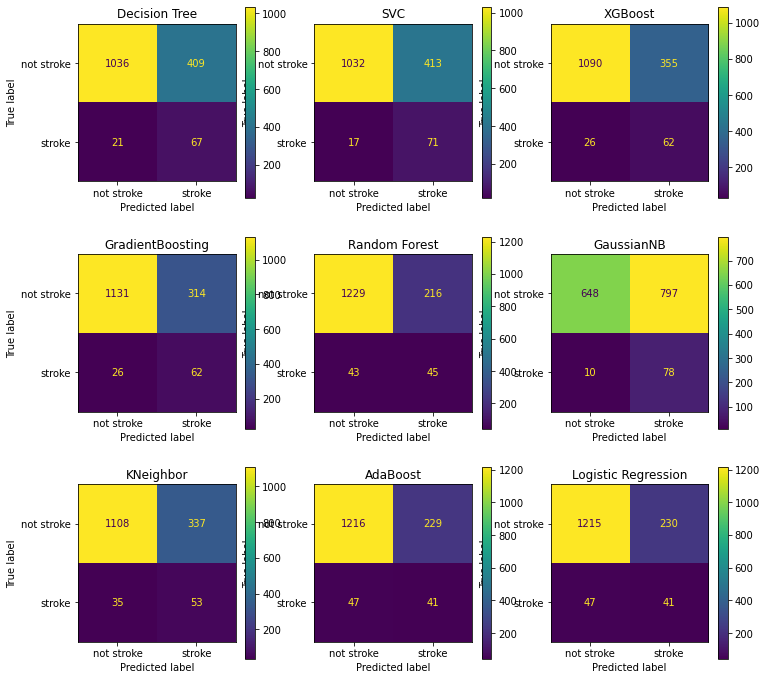

In [ ]:
# Fitting Confusion Matrix Visualization
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

fig, axs = plt.subplots(3,3, figsize=(12,12))
model = []
cms = []
for i in range(fit_df.shape[0]):
  model.append(fit_df.loc[i,'model'])
  cms.append(fit_df.loc[i,'confusion_matrix'])

n=0
for r in range(3):
  for c in range(3):
    ConfusionMatrixDisplay(cms[n], display_labels = ['not stroke', 'stroke']).plot(ax=axs[r][c])
    axs[r][c].set_title(f'{model[n]}')
    n+=1

**Cross Validation**

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
random_state=22
kf = KFold(n_splits = 10, shuffle = True, random_state=22)
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(RandomForestClassifier(n_estimators=100,random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(SVC(random_state=random_state, probability = True))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))
models = ['Decision Tree', 'LogisticRegression', 'RandomForest', 'KNN', 'GaussianNB', 'SVC', 'AdaBoost', 'Gradient', 'XGBoost']
cv_score = []
std = []
cv_results = []

for clf in classifiers:
  cv_result = cross_val_score(clf, X_train_bal, y_train_bal, cv=kf, scoring='roc_auc')
  cv_results.append(cv_result)
  cv_score.append(round(cv_result.mean(),4))
  std.append(round(cv_result.std(),4))


In [ ]:
cv_df = pd.DataFrame({'Classifier': models, 'cv_mean': cv_score, 'cv_std': std})
cv_df = cv_df.sort_values(by='cv_mean', ascending=False).reset_index(drop=True)
cv_df

,Classifier,cv_mean,cv_std
0,RandomForest,0.9659,0.0094
1,Gradient,0.9237,0.0177
2,KNN,0.9166,0.0234
3,XGBoost,0.9115,0.0218
4,SVC,0.8743,0.0260
5,AdaBoost,0.8564,0.0199
6,Decision Tree,0.8560,0.0238
7,LogisticRegression,0.8521,0.0263
8,GaussianNB,0.7922,0.0186


😁From the cross validation result, RandomForest is chosen as the best model. 

**Gridsearch Random Forest- tuning hyperparameters**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf = RandomForestClassifier(random_state=22)
rf_para = {'n_estimators': np.arange(100,200),
            'max_depth' : np.arange(2,10), 
            'min_samples_split' : np.arange(2,10),
           'min_samples_leaf' : np.arange(1,10), 
            'max_features' : np.arange(2,9)
          }
kf = KFold(n_splits = 5, shuffle=True, random_state=22)
rf_cv = RandomizedSearchCV(rf, param_distributions=rf_para, n_iter =20, scoring = 'roc_auc', random_state=22, cv =kf)
rf_cv.fit(X_train_bal, y_train_bal)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=RandomForestClassifier(random_state=22), n_iter=20,
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([2, 3, 4, 5, 6, 7, 8]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 101, 102,...
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 18

In [ ]:
rf_cv.best_score_
rf_cv.best_params_
print(f'best roc_auc score: {rf_cv.best_score_}.\nbest parameters: {rf_cv.best_params_}')

best roc_auc score: 0.9260615523450637.
best parameters: {'n_estimators': 173, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 4, 'max_depth': 9}


In [ ]:
rf = rf_cv.best_estimator_
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(f'ROC_AUC: {round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),2)}')

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1445
           1       0.17      0.73      0.28        88

    accuracy                           0.78      1533
   macro avg       0.57      0.76      0.57      1533
weighted avg       0.93      0.78      0.84      1533

ROC_AUC: 0.83


In [ ]:
# XGBoosting default
xgb = XGBClassifier(random_state=22)
xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(f'ROC_AUC: {round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),2)}')

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1445
           1       0.15      0.70      0.25        88

    accuracy                           0.75      1533
   macro avg       0.56      0.73      0.55      1533
weighted avg       0.93      0.75      0.82      1533

ROC_AUC: 0.83


In [ ]:
# XGBoosting GridSearch
xgb = XGBClassifier(random_state=22)
xgb_para = {'eta': [0.01, 0.1, 0.2],
           'max_depth': [2,4,6],
            'colsample_bytree':[0.6,0.8,1],
           'gamma': [0,1]}
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid= xgb_para, scoring = 'roc_auc', cv=5)
xgb_gridsearch.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=22),
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'eta': [0.01, 0.1, 0.2], 'gamma': [0, 1],
                         'max_depth': [2, 4, 6]},
             scoring='roc_auc')

In [ ]:
print(f'best roc_auc score: {xgb_gridsearch.best_score_}.\nbest parameters: {xgb_gridsearch.best_params_}')
xgb = xgb_gridsearch.best_estimator_
xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(f'ROC_AUC: {round(roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]),2)}')

best roc_auc score: 0.9560221442073994.
best parameters: {'colsample_bytree': 0.8, 'eta': 0.01, 'gamma': 1, 'max_depth': 6}
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1445
           1       0.19      0.55      0.28        88

    accuracy                           0.84      1533
   macro avg       0.58      0.70      0.59      1533
weighted avg       0.92      0.84      0.87      1533

ROC_AUC: 0.82


**Model Evaluation**

Random Forest: True positive rate: 0.17 True negative rate: 0.98 Overall accuracy:0.78
XGBoosting: True positive rate: 0.19 True negative rate: 0.96 Overall accuracy:0.86


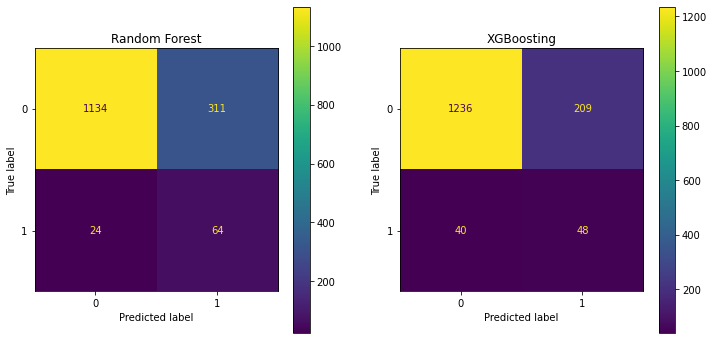

In [ ]:
# Confusion Matrix

cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
fig, axs = plt.subplots(1,2,figsize=(12,6))
ConfusionMatrixDisplay(cm_rf).plot(ax=axs[0])
axs[0].set_title('Random Forest')
ConfusionMatrixDisplay(cm_xgb).plot(ax=axs[1])
axs[1].set_title('XGBoosting')
tpr_rf=round(64/(64+311),2)
tnr_rf=round(1134/(1134+24),2)
accuracy_rf = round((64+1134)/1533,2)
tpr_xbg=round(35/(35+154),2)
tnr_xbg=round(1291/(1291+53),2)
accuracy_xbg = round((35+1291)/1533,2)
print(f'Random Forest: True positive rate: {tpr_rf} True negative rate: {tnr_rf} Overall accuracy:{accuracy_rf}')
print(f'XGBoosting: True positive rate: {tpr_xbg} True negative rate: {tnr_xbg} Overall accuracy:{accuracy_xbg}')
plt.tight_layout
plt.show()

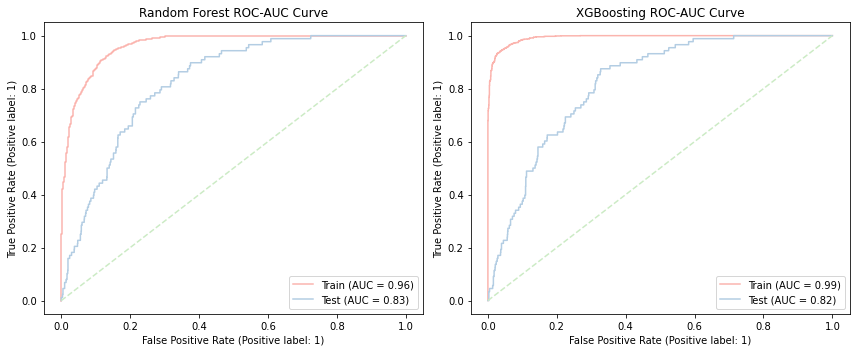

In [ ]:
#ROC-AUC Curve
from sklearn.metrics import plot_roc_curve
fig, axs = plt.subplots(1,2,figsize=(12,5))
plot_roc_curve(rf, X_train_bal, y_train_bal,ax=axs[0],name='Train')
plot_roc_curve(rf, X_test, y_test,ax=axs[0],name='Test')
axs[0].plot([0,1],[0,1],'--')
axs[0].set_title('Random Forest ROC-AUC Curve')

plot_roc_curve(xgb, X_train_bal, y_train_bal,ax=axs[1],name='Train')
plot_roc_curve(xgb, X_test, y_test,ax=axs[1],name='Test')
axs[1].plot([0,1],[0,1],'--')
axs[1].set_title('XGBoosting ROC-AUC Curve')
plt.tight_layout()
plt.show()

The ROC-AUC curve of training data performs better than the test data in both models, indicating that there the classifiers still have room to improve to further control the overfitting.

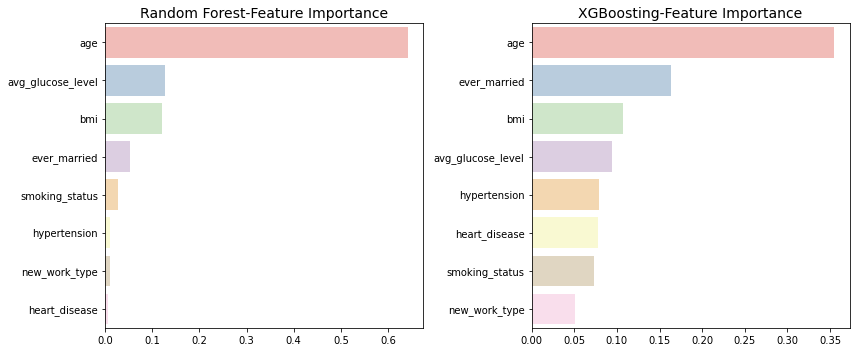

In [ ]:
# Feature Importance
feat_imp_rf = pd.Series(rf.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)
feat_imp_xgb = pd.Series(xgb.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)
fig,axs= plt.subplots(1,2, figsize=(12,5))
sns.barplot(x=feat_imp_rf, y=feat_imp_rf.index,ax=axs[0] )
axs[0].set_title('Random Forest-Feature Importance', fontsize=14)
sns.barplot(x=feat_imp_xgb, y=feat_imp_xgb.index,ax=axs[1] )
axs[1].set_title('XGBoosting-Feature Importance', fontsize=14)
plt.tight_layout()
plt.show()

# Conclusion
- A thorough EDA has been carried out to analyze different potential factors for prediction of stroke. 
- Different classifier models have been fitted for stroke prediction, Random Forest and XGBoosting have been standed out.
- While they show a good prediction on testing data, there are still room to improve the model to avoid the overfitting and to decrease the effects of imbalanced training data. 